In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('train_dataset_cleaned.csv', encoding='utf_16', index_col='Registration_Number')
df = data_raw.copy()

df.head()

Annual_Turnover           Cuisine       City  \
Registration_Number                                                 
60001                       42000000      indian,irish  Bangalore   
60002                       50000000      indian,irish     Indore   
60003                       32500000   tibetan,italian    Chennai   
60004                      110000000  turkish,nigerian    Gurgaon   
60005                       20000000     irish,belgian    Manesar   

                    Restaurant_Location Opening_Day_of_Restaurant  \
Registration_Number                                                 
60001                 Near Business Hub                2009-02-14   
60002                    Near Party Hub                2008-09-29   
60003                 Near Business Hub                2011-07-30   
60004                    Near Party Hub                2008-11-30   
60005                    Near Party Hub                2010-02-22   

                     Facebook_Popularity_Quotient       Endorsed_By  \
Registration_Number                                                   
60001                                        84.3      Not Specific   
60002                                        85.4  Tier A Celebrity   
60003                                        85.0  Tier A Celebrity   
60004                                        85.6  Tier A Celebrity   
60005                                         NaN  Tier A Celebrity   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
60001                                         95.8        True   
60002                                         85.0        True   
60003                                         68.2        True   
60004                                         83.6       False   
60005                                         76.8        True   

                     Liquor_License_Obtained  ...  Live_Music_Rating  \
Registration_Number                           ...                      
60001                                   True  ...                4.0   
60002                                   True  ...                NaN   
60003                                   True  ...                3.0   
60004                                   True  ...                6.0   
60005                                   True  ...                NaN   

                     Comedy_Gigs_Rating  Value_Deals_Rating  \
Registration_Number                                           
60001                               NaN                 NaN   
60002                               4.0                 NaN   
60003                               NaN                 NaN   
60004                               NaN                 NaN   
60005                               2.0                 NaN   

                     Live_Sports_Rating Ambience Lively  Service  \
Registration_Number                                                
60001                               NaN      8.0      8        6   
60002                               NaN      5.0      7        7   
60003                               NaN      7.0     10        5   
60004                               NaN      7.0      7        4   
60005                               NaN      NaN      6        2   

                     Comfortablility  Privacy           State  
Registration_Number                                            
60001                              6        6       Karnataka  
60002                              3        8  Madhya Pradesh  
60003                              2        8      Tamil Nadu  
60004                              3        5         Haryana  
60005                              4        6         Haryana  

[5 rows x 34 columns]

In [3]:
df.columns

Index(['Annual_Turnover', 'Cuisine', 'City', 'Restaurant_Location',
       'Opening_Day_of_Restaurant', 'Facebook_Popularity_Quotient',
       'Endorsed_By', 'Instagram_Popularity_Quotient', 'Fire_Audit',
       'Liquor_License_Obtained', 'Situated_in_a_Multi_Complex',
       'Dedicated_Parking', 'Open_Sitting_Available', 'Resturant_Tier',
       'Restaurant_Type', 'Restaurant_Theme', 'Restaurant_Zomato_Rating',
       'Restaurant_City_Tier', 'Order_Wait_Time', 'Staff_Responsivness',
       'Value_for_Money', 'Hygiene_Rating', 'Food_Rating',
       'Overall_Restaurant_Rating', 'Live_Music_Rating', 'Comedy_Gigs_Rating',
       'Value_Deals_Rating', 'Live_Sports_Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy', 'State'],
      dtype='object')

In [4]:
for c in df.columns:
    print(c, df[c].unique())

Annual_Turnover [ 42000000  50000000  32500000 110000000  20000000  30000000  40000000
  60000000  23000000  45000000  27000000  35000000  25000000  12000000
  32000000  19000000  18000000  33500000  43500000  34500000  14500000
  22000000  53000000  34000000  36000000  21500000   8000000  33000000
  38000000  11000000  20500000   9500000  39000000   6000000  24000000
  52500000  30500000  15000000  31000000  45500000  80000000  10000000
  28000000  44500000  31500000  37000000  27500000 150000000  42500000
  47000000  46000000  51000000  48000000  17000000  64000000  22500000
  44000000 120000000  67500000  10500000  19500000  38500000  23500000
  61500000  29000000  14000000  40500000 186000000  37500000  43000000
  66000000   7000000  41000000  55000000   3500000  11500000  41500000
  26500000  28500000  24500000  39500000  56000000  70000000  18500000
  16000000  62500000   8500000  13500000  78500000  21000000  15500000
  35500000  53500000  69000000  26000000 111000000 100000000 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3493 entries, 60001 to 63493
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual_Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant_Location            3493 non-null   object 
 4   Opening_Day_of_Restaurant      3493 non-null   object 
 5   Facebook_Popularity_Quotient   3394 non-null   float64
 6   Endorsed_By                    3493 non-null   object 
 7   Instagram_Popularity_Quotient  3437 non-null   float64
 8   Fire_Audit                     3493 non-null   bool   
 9   Liquor_License_Obtained        3493 non-null   bool   
 10  Situated_in_a_Multi_Complex    3493 non-null   bool   
 11  Dedicated_Parking              3493 non-null   bool   
 12  Open_Sitting_Available         3493 non-null   b

Jot down thoughts:

- **Registration_Number** is the index column
- **Open_Date_of_Restaurant** should be a datetime column. However, for usefulness, we will convert it into number of days opened so far (use today as the cutoff date, so the number of days opened will be the difference between today and the date the restaurant was opened)
- Need to look at Restaurant_Tier, Restaurant_City_Tier
- Value_Deals_Rating and Live_Sports_Rating might not be useful, as there are simply too many missing values. Same as Comedy_Gigs_Rating
- Annual_Turnover is our Y column (dependent variable)
- Both Cuisine and City can be multiple values, so we need to split them up
- Since there are too many cities, we now group them using the State column instead. the City column will be ignored in the training

In [6]:
df.describe().T

count          mean           std        min  \
Annual_Turnover                3493.0  3.072571e+07  2.165125e+07  3500000.0   
Facebook_Popularity_Quotient   3394.0  7.793872e+01  9.829169e+00       43.0   
Instagram_Popularity_Quotient  3437.0  7.440468e+01  1.094033e+01       40.0   
Resturant_Tier                 3444.0  1.926539e+00  2.609297e-01        1.0   
Restaurant_Zomato_Rating       3493.0  2.696536e+00  7.872713e-01        0.0   
Order_Wait_Time                3493.0  5.509591e+00  2.854476e+00        1.0   
Staff_Responsivness            3493.0  4.538506e+00  1.093832e+00        1.0   
Value_for_Money                3493.0  4.526482e+00  9.139370e-01        1.0   
Hygiene_Rating                 3493.0  4.661895e+00  1.259523e+00        1.0   
Food_Rating                    3493.0  7.522760e+00  1.722721e+00        5.0   
Overall_Restaurant_Rating      3281.0  8.479427e+00  1.287233e+00        6.0   
Live_Music_Rating              2728.0  4.012830e+00  1.009044e+00        1.0   
Comedy_Gigs_Rating             1010.0  2.932673e+00  8.595190e-01        1.0   
Value_Deals_Rating              786.0  3.655216e+00  9.732496e-01        1.0   
Live_Sports_Rating              205.0  3.590244e+00  9.063515e-01        2.0   
Ambience                       3468.0  6.423010e+00  2.050026e+00        0.0   
Lively                         3493.0  6.874893e+00  1.847131e+00        0.0   
Service                        3493.0  4.546808e+00  1.877063e+00        0.0   
Comfortablility                3493.0  3.231320e+00  1.993050e+00        0.0   
Privacy                        3493.0  6.275122e+00  1.895057e+00        0.0   

                                      25%          50%           75%  \
Annual_Turnover                18000000.0  30000000.00  3.700000e+07   
Facebook_Popularity_Quotient         72.0        79.00  8.574500e+01   
Instagram_Popularity_Quotient        66.0        74.05  8.240000e+01   
Resturant_Tier                        2.0         2.00  2.000000e+00   
Restaurant_Zomato_Rating              2.0         3.00  3.000000e+00   
Order_Wait_Time                       3.0         5.00  8.000000e+00   
Staff_Responsivness                   4.0         5.00  5.000000e+00   
Value_for_Money                       4.0         5.00  5.000000e+00   
Hygiene_Rating                        4.0         5.00  6.000000e+00   
Food_Rating                           6.0         7.00  9.000000e+00   
Overall_Restaurant_Rating             7.0         9.00  1.000000e+01   
Live_Music_Rating                     3.0         4.00  5.000000e+00   
Comedy_Gigs_Rating                    2.0         3.00  3.000000e+00   
Value_Deals_Rating                    3.0         4.00  4.000000e+00   
Live_Sports_Rating                    3.0         4.00  4.000000e+00   
Ambience                              5.0         7.00  8.000000e+00   
Lively                                6.0         7.00  8.000000e+00   
Service                               3.0         5.00  6.000000e+00   
Comfortablility                       2.0         3.00  5.000000e+00   
Privacy                               5.0         6.00  8.000000e+00   

                                        max  
Annual_Turnover                4.000000e+08  
Facebook_Popularity_Quotient   9.776000e+01  
Instagram_Popularity_Quotient  9.870000e+01  
Resturant_Tier                 2.000000e+00  
Restaurant_Zomato_Rating       5.000000e+00  
Order_Wait_Time                1.000000e+01  
Staff_Responsivness            8.000000e+00  
Value_for_Money                7.000000e+00  
Hygiene_Rating                 9.000000e+00  
Food_Rating                    1.000000e+01  
Overall_Restaurant_Rating      1.000000e+01  
Live_Music_Rating              8.000000e+00  
Comedy_Gigs_Rating             6.000000e+00  
Value_Deals_Rating             7.000000e+00  
Live_Sports_Rating             6.000000e+00  
Ambience                       1.000000e+01  
Lively                         1.000000e+01  
Service   

In [7]:
# Get a list of distinct States, with any value having a comma splitted into a list
states = df['State'].str.split(',').str[0].unique()
states

array(['Karnataka', 'Madhya Pradesh', 'Tamil Nadu', 'Haryana',
       'Telangana', 'Uttar Pradesh', 'West Bengal', 'Maharashtra',
       'Unknown', 'Punjab', 'Delhi', 'Odisha', 'Rajasthan', 'Gujarat',
       'Kerala', 'Jharkhand', 'Himachal Pradesh', 'Daman and Diu',
       'Andhra Pradesh', 'Bihar', 'Chhattisgarh', 'Uttarakhand',
       'Chandigarh', 'Meghalaya', 'Puducherry', 'Jammu and Kashmir'],
      dtype=object)

We eventually will use this State list to get the state dummy columns. At that point, we will remove "Unknown" as the dummy variable to be dropped for training.

In [8]:
# Get a list of distinct Cuisine, with any value having a comma splitted into a list
cuisines = df['Cuisine'].str.split(',').str[0].unique()
cuisines

array(['indian', 'tibetan', 'turkish', 'irish', 'chinese', 'algerian',
       'welsh', 'peruvian', 'japanese', 'british', 'nigerian', 'polish',
       'cuban', 'swedish', 'hawaiian'], dtype=object)

Time to do some fill-up. Get a list of variables that have missing values (and the count). The list should exclude any column that does not have missing value.

In [9]:
# Get a list of columns that have missing values
missing_cols = df.columns[df.isnull().any()]
missing_cols.to_numpy()

array(['Facebook_Popularity_Quotient', 'Instagram_Popularity_Quotient',
       'Resturant_Tier', 'Overall_Restaurant_Rating', 'Live_Music_Rating',
       'Comedy_Gigs_Rating', 'Value_Deals_Rating', 'Live_Sports_Rating',
       'Ambience'], dtype=object)

In [10]:
df.isnull().sum()

Annual_Turnover                     0
Cuisine                             0
City                                0
Restaurant_Location                 0
Opening_Day_of_Restaurant           0
Facebook_Popularity_Quotient       99
Endorsed_By                         0
Instagram_Popularity_Quotient      56
Fire_Audit                          0
Liquor_License_Obtained             0
Situated_in_a_Multi_Complex         0
Dedicated_Parking                   0
Open_Sitting_Available              0
Resturant_Tier                     49
Restaurant_Type                     0
Restaurant_Theme                    0
Restaurant_Zomato_Rating            0
Restaurant_City_Tier                0
Order_Wait_Time                     0
Staff_Responsivness                 0
Value_for_Money                     0
Hygiene_Rating                      0
Food_Rating                         0
Overall_Restaurant_Rating         212
Live_Music_Rating                 765
Comedy_Gigs_Rating               2483
Value_Deals_

Let's plot them to see the distribution of the missing values

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


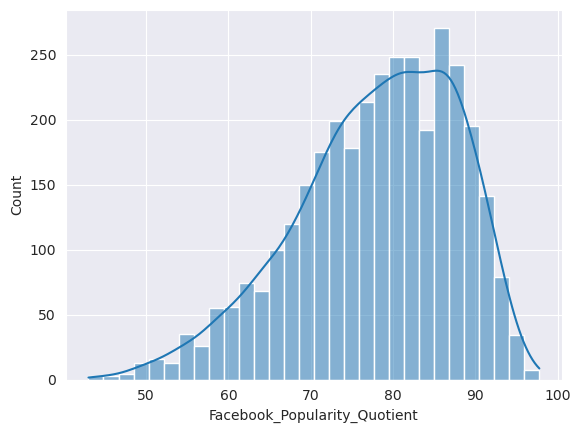

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


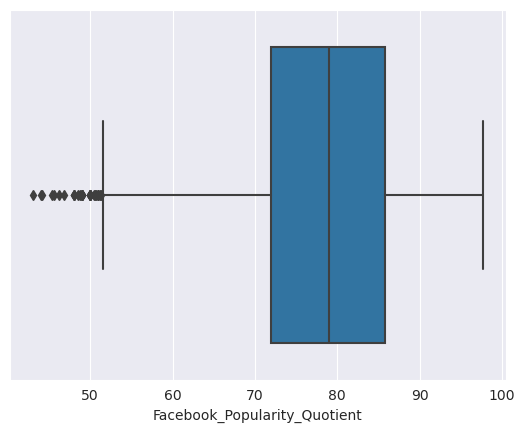

In [11]:
# Facebook_Popularity_Quotient - let's see the distribution right now
sns.histplot(data=df, x='Facebook_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Facebook_Popularity_Quotient')
plt.show()

In [12]:
# check with median again
df.Facebook_Popularity_Quotient.describe()

count    3394.000000
mean       77.938715
std         9.829169
min        43.000000
25%        72.000000
50%        79.000000
75%        85.745000
max        97.760000
Name: Facebook_Popularity_Quotient, dtype: float64

In [13]:
# fill up the missing values with median
df.Facebook_Popularity_Quotient.fillna(df.Facebook_Popularity_Quotient.median(), inplace=True)

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


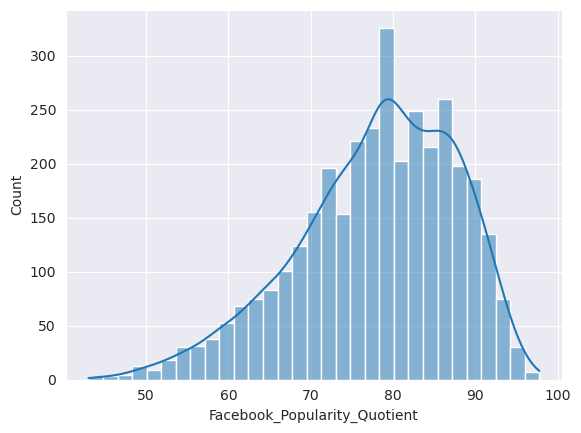

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


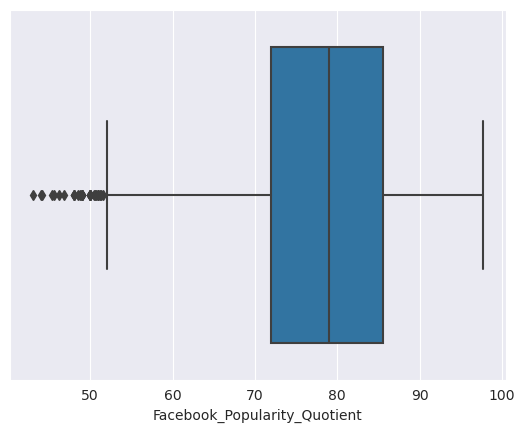

In [14]:
# check plots again
sns.histplot(data=df, x='Facebook_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Facebook_Popularity_Quotient')
plt.show()

In [15]:
# check with median again
df.Facebook_Popularity_Quotient.describe()

count    3493.000000
mean       77.968795
std         9.690437
min        43.000000
25%        72.000000
50%        79.000000
75%        85.600000
max        97.760000
Name: Facebook_Popularity_Quotient, dtype: float64

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


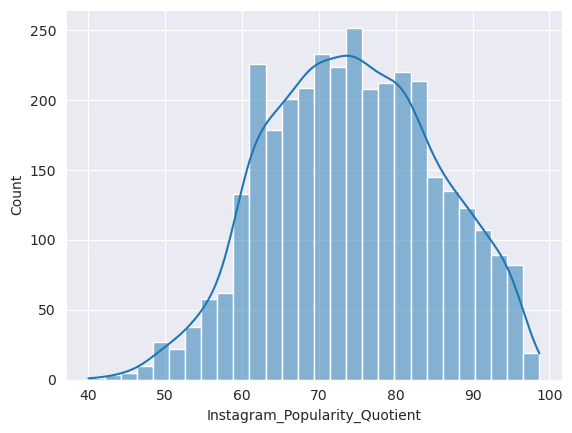

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


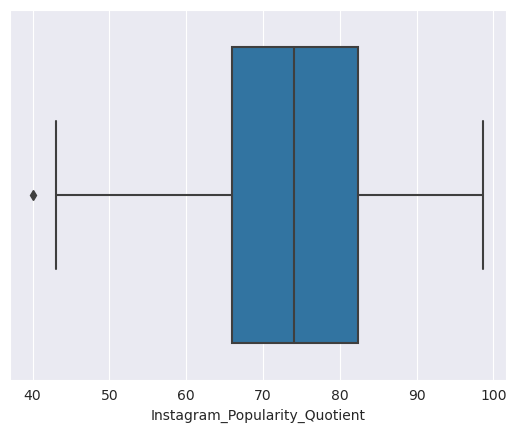

In [16]:
# Instagram Popularity Quotient
sns.histplot(data=df, x='Instagram_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Instagram_Popularity_Quotient')
plt.show()

In [17]:
df.Instagram_Popularity_Quotient.describe()

count    3437.000000
mean       74.404684
std        10.940327
min        40.000000
25%        66.000000
50%        74.050000
75%        82.400000
max        98.700000
Name: Instagram_Popularity_Quotient, dtype: float64

In [18]:
# fill up missing value with mean
df.Instagram_Popularity_Quotient.fillna(df.Instagram_Popularity_Quotient.mean(), inplace=True)
df.Instagram_Popularity_Quotient.describe()

count    3493.000000
mean       74.404684
std        10.852249
min        40.000000
25%        66.400000
50%        74.400000
75%        82.200000
max        98.700000
Name: Instagram_Popularity_Quotient, dtype: float64

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


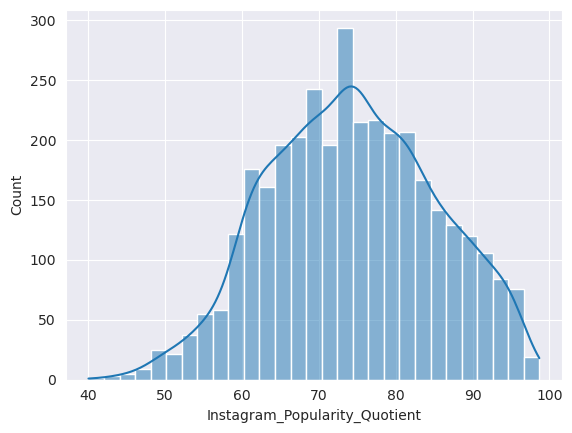

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


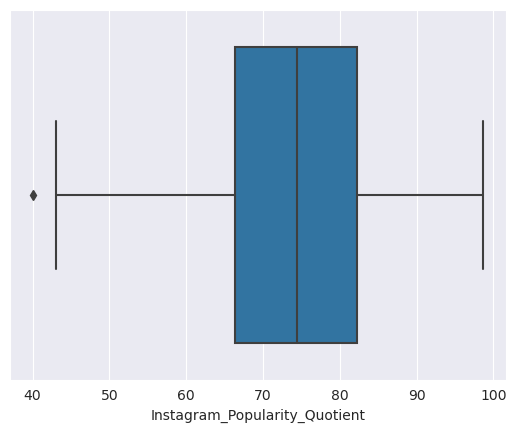

In [19]:
# Instagram Popularity Quotient
sns.histplot(data=df, x='Instagram_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Instagram_Popularity_Quotient')
plt.show()

In [20]:
# restaurant tier - let's see its unique value set
df.Resturant_Tier.unique()

array([ 2.,  1., nan])

So this one actually seems like categorical data. Let's plot a count plot to see the distribution

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Resturant_Tier', ylabel='count'>

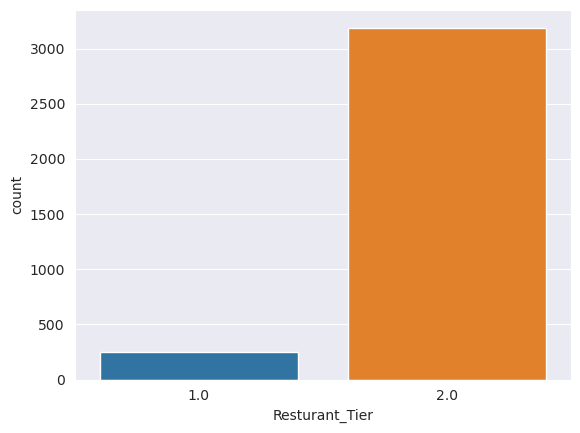

In [21]:
sns.countplot(data=df, x='Resturant_Tier')

In [22]:
# fill up missing value with mode
df.Resturant_Tier.fillna(df.Resturant_Tier.mode()[0], inplace=True)
df.Resturant_Tier.describe()

count    3493.000000
mean        1.927569
std         0.259237
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Resturant_Tier, dtype: float64

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Resturant_Tier', ylabel='count'>

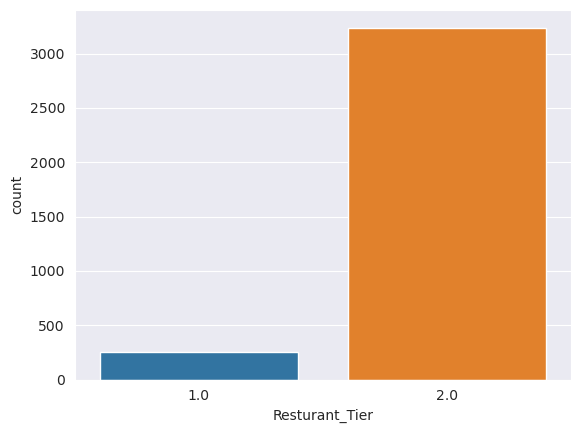

In [23]:
sns.countplot(data=df, x='Resturant_Tier')

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


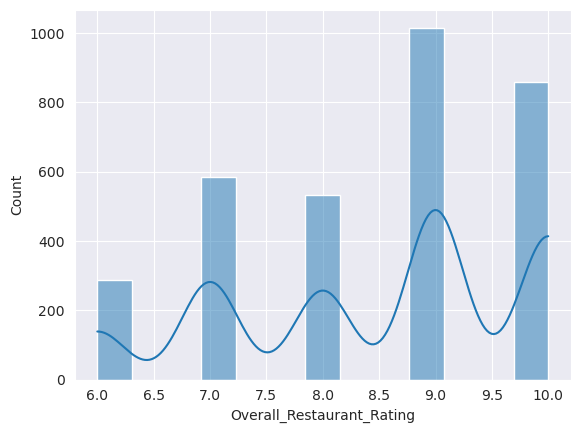

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


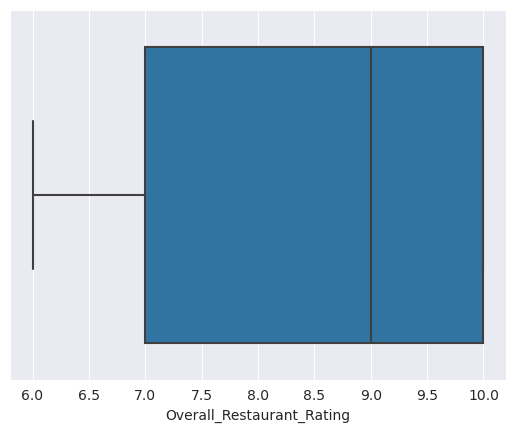

In [24]:
# Overall_Restaurant_Rating
sns.histplot(data=df, x='Overall_Restaurant_Rating', kde=True)
plt.show()
sns.boxplot(data=df, x='Overall_Restaurant_Rating')
plt.show()

In [25]:
df.Overall_Restaurant_Rating.describe()

count    3281.000000
mean        8.479427
std         1.287233
min         6.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: Overall_Restaurant_Rating, dtype: float64

Treat it as categorical - in this case, we will fill up the missing values with the mode

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Overall_Restaurant_Rating', ylabel='count'>

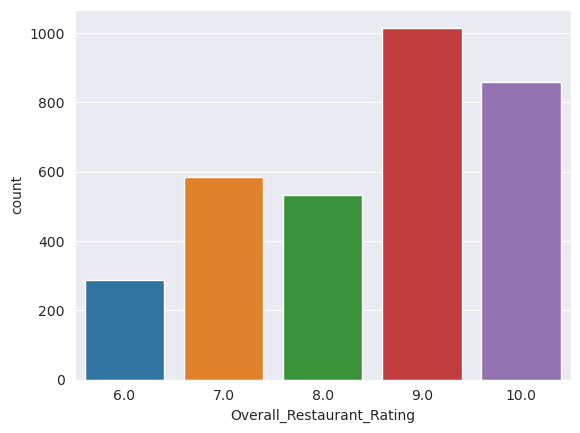

In [26]:
sns.countplot(data=df, x='Overall_Restaurant_Rating')

In [27]:
df.Overall_Restaurant_Rating.fillna(df.Overall_Restaurant_Rating.median(), inplace=True)

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Overall_Restaurant_Rating', ylabel='count'>

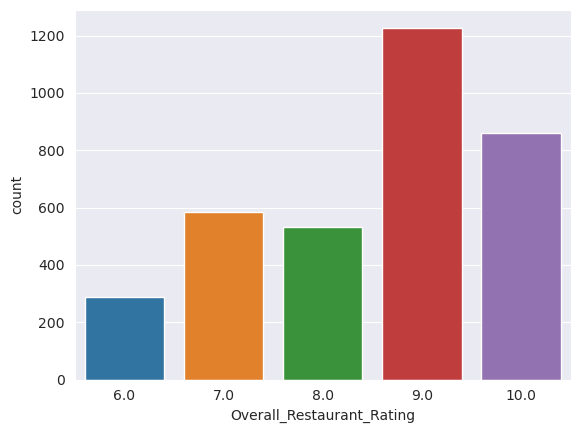

In [28]:
sns.countplot(data=df, x='Overall_Restaurant_Rating')

Restaurant_Theme - let's see its unique value set

In [29]:
df.Restaurant_Theme.unique()

array(['Arabian', 'Greek', "90's", 'Nature', 'Parsi', 'English',
       'Chinese', 'Delicio', 'Molino', 'Petit', 'Downtown', 'Italica',
       'Bettaso', 'Bakery', 'Mise En', 'Umami', 'Moonrise', 'Belise',
       'Cinnamon', 'Resca', 'TheGem', 'Benedicta', 'Marco', 'LaCuisine',
       'Spoon', 'Grand', 'Picante', 'Carbone', 'Flavors', 'Cafepro',
       'Savory', 'Piquant', 'Sage', 'Ambiance'], dtype=object)

In [30]:
df.Restaurant_Theme.value_counts()

Restaurant_Theme
Arabian      1373
Greek        1030
90's          584
Nature        179
Parsi         103
Chinese        74
Delicio        23
Molino         22
English        19
Belise         14
Downtown       10
Moonrise       10
Mise En         7
TheGem          6
Carbone         4
Petit           4
Marco           4
Umami           3
Benedicta       3
Picante         3
Bettaso         2
Resca           2
Savory          2
Cafepro         2
Sage            1
Piquant         1
Flavors         1
Grand           1
Cinnamon        1
Spoon           1
LaCuisine       1
Italica         1
Bakery          1
Ambiance        1
Name: count, dtype: int64

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


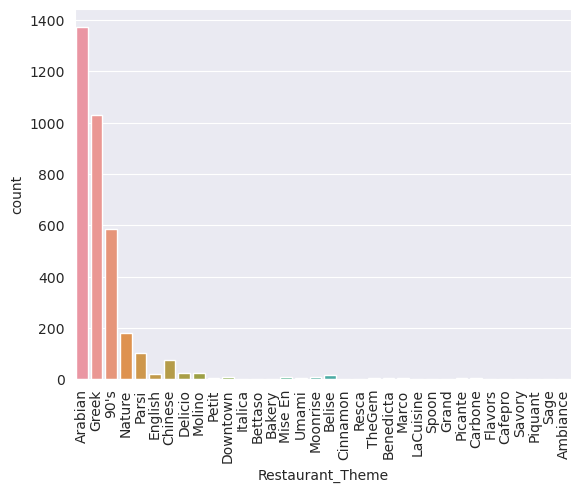

In [31]:
sns.countplot(data=df, x='Restaurant_Theme')
# rotate x label
plt.xticks(rotation=90)
plt.show()

In [32]:
# fill up missing value with mode
df.Restaurant_Theme.fillna(df.Restaurant_Theme.mode()[0], inplace=True)

In [33]:
# live music rating
df.Live_Music_Rating.isnull().sum()

765

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


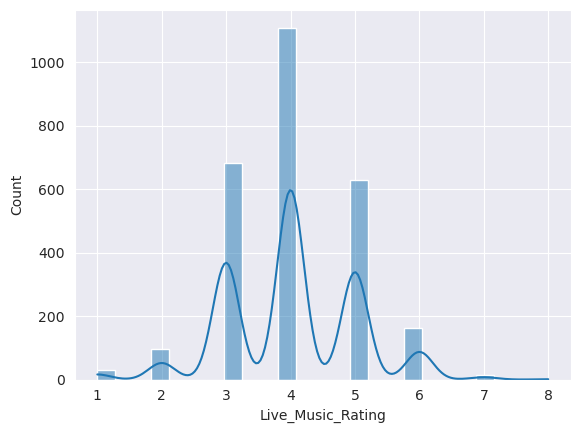

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


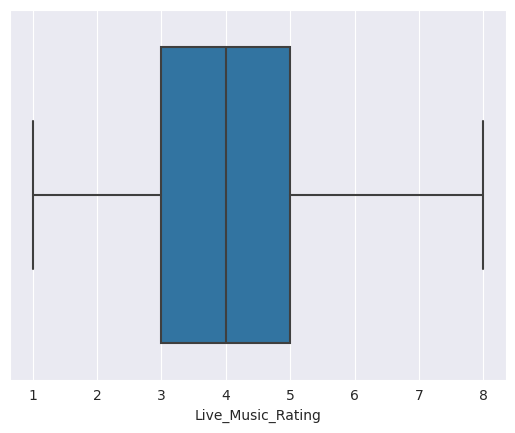

In [34]:
sns.histplot(data=df, x='Live_Music_Rating', kde=True)
plt.show()
sns.boxplot(data=df, x='Live_Music_Rating')
plt.show()

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Live_Music_Rating', ylabel='count'>

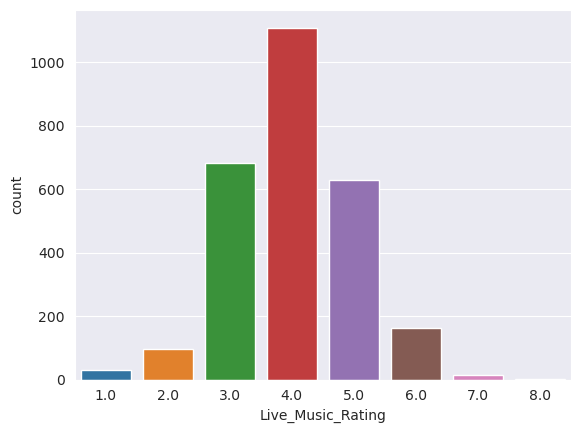

In [35]:
# count plot
sns.countplot(data=df, x='Live_Music_Rating')

In [36]:
# fill up missing value with median
df.Live_Music_Rating.fillna(df.Live_Music_Rating.median(), inplace=True)

In [37]:
# Comedy_Gigs_Rating
df.Comedy_Gigs_Rating.isnull().sum()

2483

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


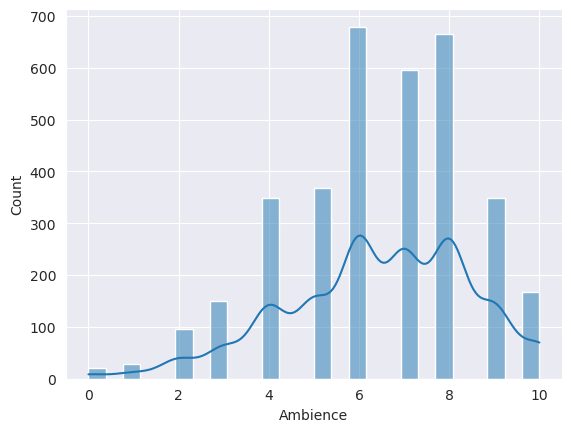

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


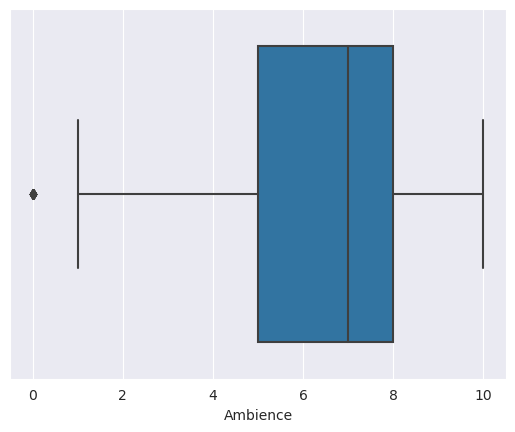

In [38]:
# Ambience
sns.histplot(data=df, x='Ambience', kde=True)
plt.show()
sns.boxplot(data=df, x='Ambience')
plt.show()

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ambience', ylabel='count'>

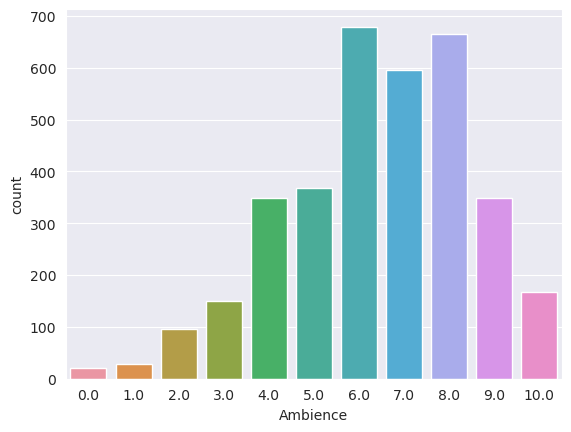

In [39]:
# count plot
sns.countplot(data=df, x='Ambience')

In [40]:
# fill up missing value with median
df.Ambience.fillna(df.Ambience.median(), inplace=True)

<Axes: >

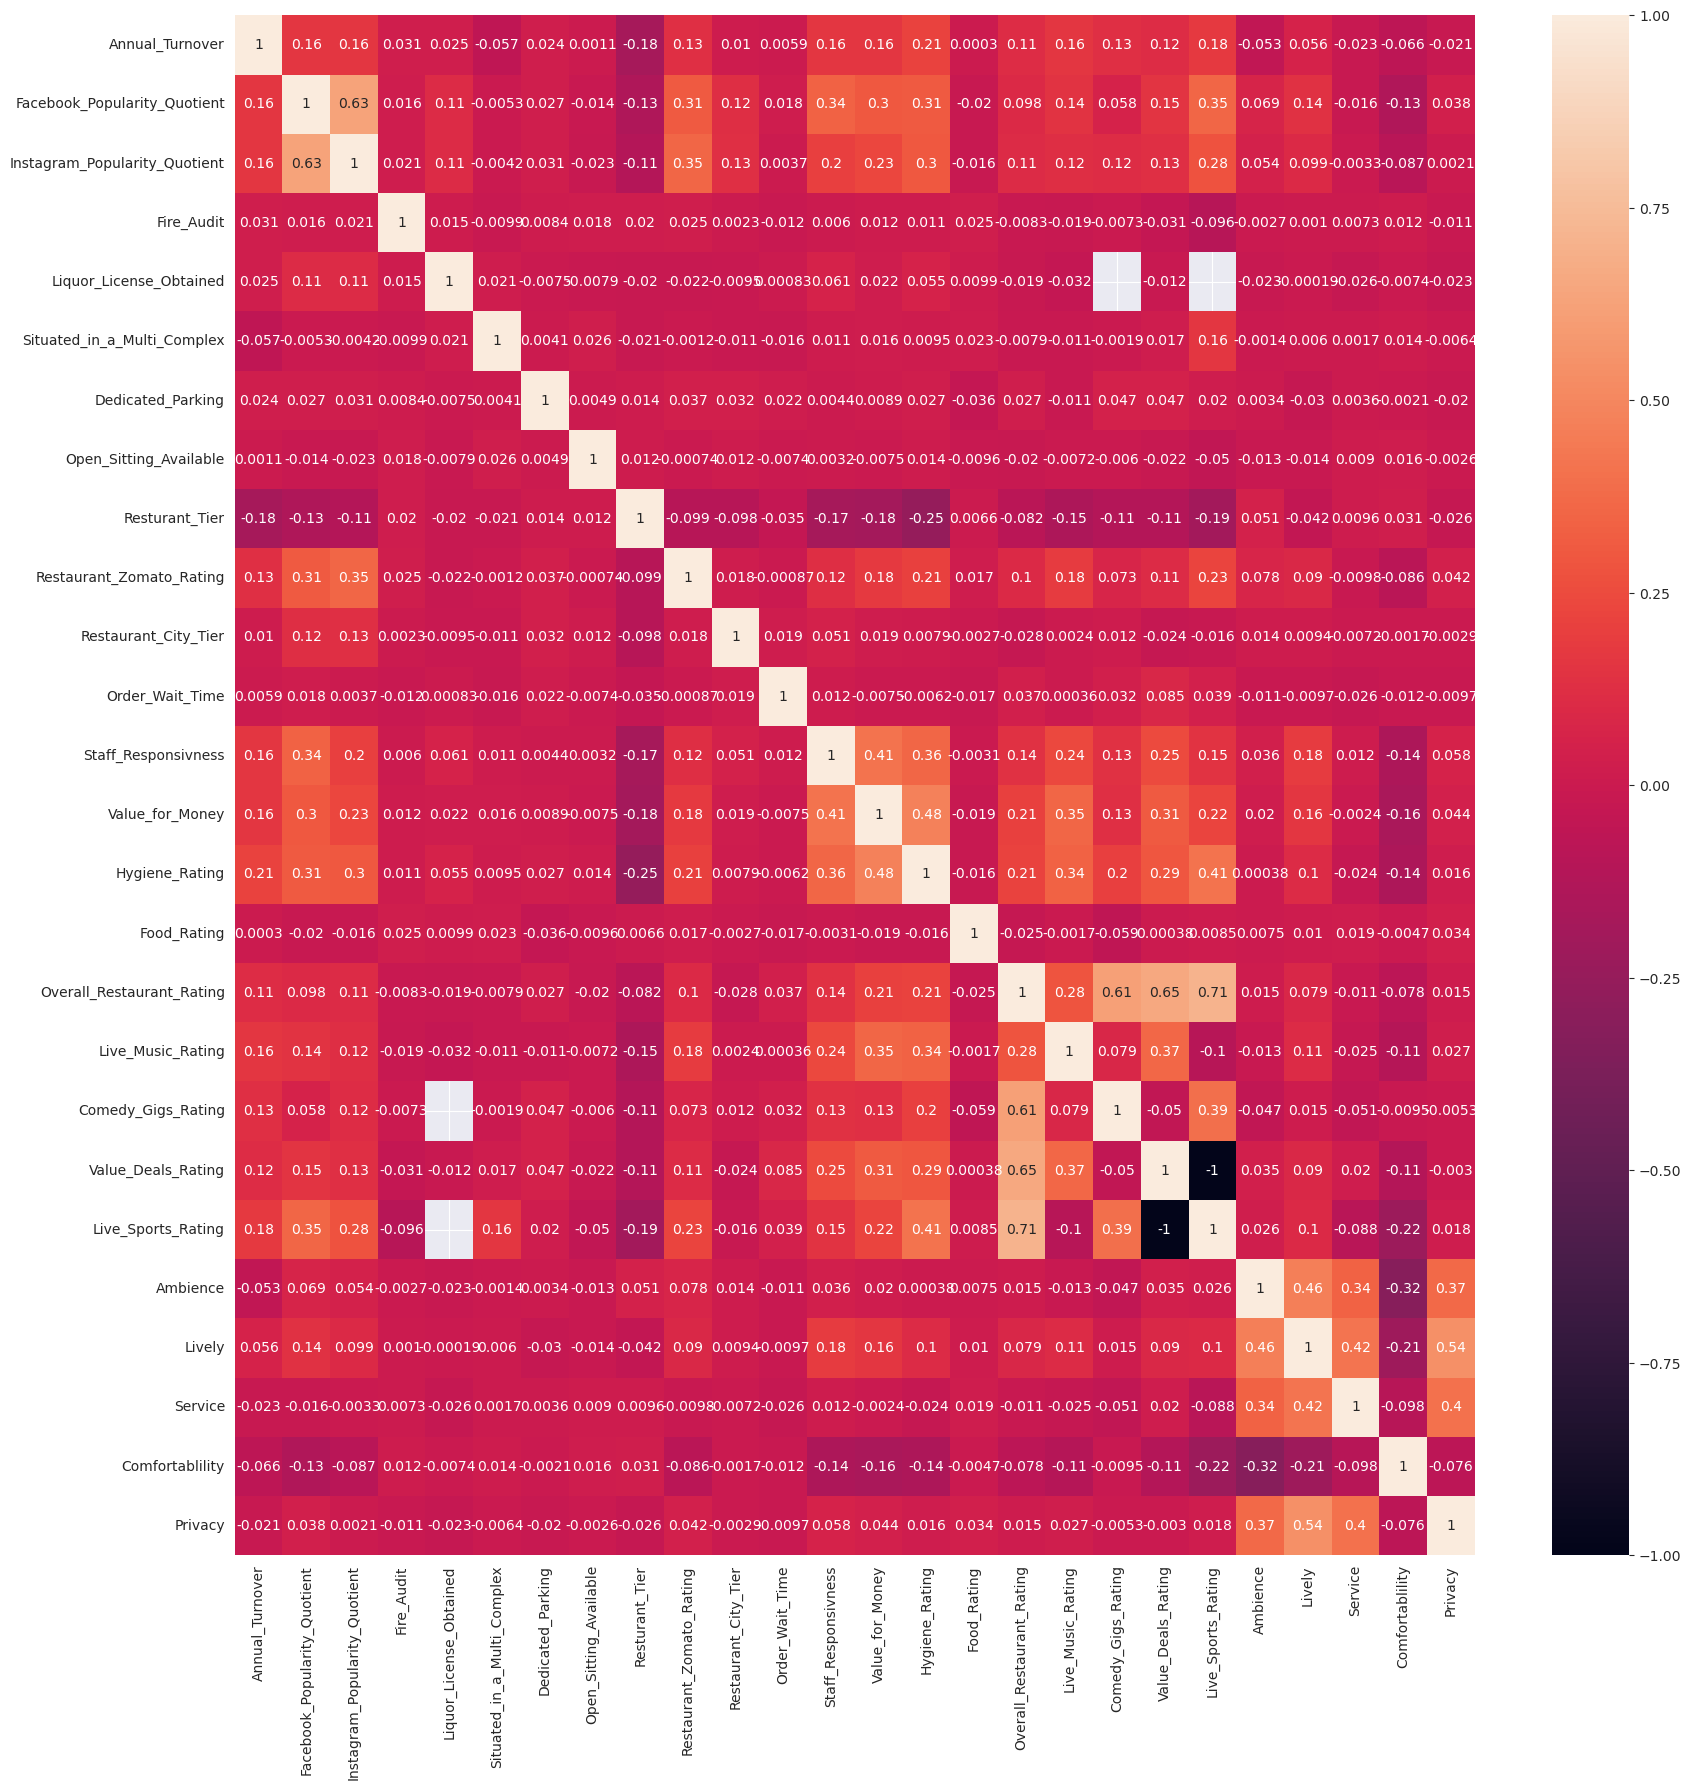

In [41]:
# make a heatmap to see the correlation
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [42]:
# first, import intelex and patch
from sklearnex import patch_sklearn
patch_sklearn()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [43]:
print(df.columns)

Index(['Annual_Turnover', 'Cuisine', 'City', 'Restaurant_Location',
       'Opening_Day_of_Restaurant', 'Facebook_Popularity_Quotient',
       'Endorsed_By', 'Instagram_Popularity_Quotient', 'Fire_Audit',
       'Liquor_License_Obtained', 'Situated_in_a_Multi_Complex',
       'Dedicated_Parking', 'Open_Sitting_Available', 'Resturant_Tier',
       'Restaurant_Type', 'Restaurant_Theme', 'Restaurant_Zomato_Rating',
       'Restaurant_City_Tier', 'Order_Wait_Time', 'Staff_Responsivness',
       'Value_for_Money', 'Hygiene_Rating', 'Food_Rating',
       'Overall_Restaurant_Rating', 'Live_Music_Rating', 'Comedy_Gigs_Rating',
       'Value_Deals_Rating', 'Live_Sports_Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy', 'State'],
      dtype='object')


In [44]:
df.Opening_Day_of_Restaurant.max()

'2016-05-22'

In [45]:
df_train = df.copy()
df_train['Days_Opened'] = (pd.to_datetime('2017-01-01') - pd.to_datetime(df_train.Opening_Day_of_Restaurant)).dt.days
# get dummies for restaurant location
df_train = pd.get_dummies(df_train, columns=['Restaurant_Location'], dtype=int, drop_first=True)
# dummies for Endorsed_By
df_train = pd.get_dummies(df_train, columns=['Endorsed_By'], dtype=int)
df_train.drop(columns=['Endorsed_By_Not Specific'], inplace=True)
df_train = pd.get_dummies(df_train, columns=['Restaurant_Type'], dtype=int, drop_first=True)
df_train = pd.get_dummies(df_train, columns=['Restaurant_Theme'], dtype=int, drop_first=True)
df_train.head()

Annual_Turnover           Cuisine       City  \
Registration_Number                                                 
60001                       42000000      indian,irish  Bangalore   
60002                       50000000      indian,irish     Indore   
60003                       32500000   tibetan,italian    Chennai   
60004                      110000000  turkish,nigerian    Gurgaon   
60005                       20000000     irish,belgian    Manesar   

                    Opening_Day_of_Restaurant  Facebook_Popularity_Quotient  \
Registration_Number                                                           
60001                              2009-02-14                          84.3   
60002                              2008-09-29                          85.4   
60003                              2011-07-30                          85.0   
60004                              2008-11-30                          85.6   
60005                              2010-02-22                          79.0   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
60001                                         95.8        True   
60002                                         85.0        True   
60003                                         68.2        True   
60004                                         83.6       False   
60005                                         76.8        True   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
60001                                   True                         True   
60002                                   True                         True   
60003                                   True                         True   
60004                                   True                         True   
60005                                   True                         True   

                     Dedicated_Parking  ...  Restaurant_Theme_Parsi  \
Registration_Number                     ...                           
60001                            False  ...                       0   
60002                             True  ...                       0   
60003                             True  ...                       0   
60004                             True  ...                       0   
60005                             True  ...                       0   

                     Restaurant_Theme_Petit  Restaurant_Theme_Picante  \
Registration_Number                                                     
60001                                     0                         0   
60002                                     0                         0   
60003                                     0                         0   
60004                                     0                         0   
60005                                     0                         0   

                     Restaurant_Theme_Piquant  Restaurant_Theme_Resca  \
Registration_Number                                                     
60001                                       0                       0   
60002                                       0                       0   
60003                                       0                       0   
60004                                       0                       0   
60005                                       0                       0   

                     Restaurant_Theme_Sage  Restaurant_Theme_Savory  \
Registration_Number                                                   
60001                                    0                        0   
60002                                    0                        0   
60003                                    0                        0   
60004                                    0                        0   
60005                           

In [46]:
df_train['State'].str.get_dummies(sep=',').query('index == 60398').head()

Andhra Pradesh  Bihar  Chandigarh  Chhattisgarh  \
Registration_Number                                                    
60398                             0      0           0             0   

                     Daman and Diu  Delhi  Gujarat  Haryana  Himachal Pradesh  \
Registration_Number                                                             
60398                            0      0        1        0                 0   

                     Jammu and Kashmir  ...  Odisha  Puducherry  Punjab  \
Registration_Number                     ...                               
60398                                0  ...       0           0       0   

                     Rajasthan  Tamil Nadu  Telangana  Unknown  Uttar Pradesh  \
Registration_Number                                                             
60398                        0           1          0        0              0   

                     Uttarakhand  West Bengal  
Registration_Number                            
60398                          0            0  

[1 rows x 26 columns]

In [47]:
df_train[df_train.State.str.contains(',')].head()

Annual_Turnover           Cuisine  \
Registration_Number                                      
60398                       10000000  turkish,nigerian   
60795                       38500000     swedish,greek   
61115                       33500000     japanese,thai   
61346                       46000000      indian,irish   
62247                       42500000  turkish,nigerian   

                                                     City  \
Registration_Number                                         
60398                                            Kolkata`   
60795                Kochi/Cochin, Chennai and Coimbatore   
61115                                    Chennai & Mumbai   
61346                                 kudankulam ,tarapur   
62247                                  Chennai, Bangalore   

                    Opening_Day_of_Restaurant  Facebook_Popularity_Quotient  \
Registration_Number                                                           
60398                              2010-09-28                         71.50   
60795                              2008-04-24                         93.60   
61115                              2010-07-26                         81.20   
61346                              2010-10-30                         74.00   
62247                              2008-07-25                         92.64   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
60398                                        62.00        True   
60795                                        74.00        True   
61115                                        75.40        True   
61346                                        79.80        True   
62247                                        82.33        True   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
60398                                   True                         True   
60795                                  False                         True   
61115                                   True                         True   
61346                                   True                         True   
62247                                   True                         True   

                     Dedicated_Parking  ...  Restaurant_Theme_Parsi  \
Registration_Number                     ...                           
60398                             True  ...                       0   
60795                            False  ...                       0   
61115                             True  ...                       0   
61346                             True  ...                       0   
62247                             True  ...                       0   

                     Restaurant_Theme_Petit  Restaurant_Theme_Picante  \
Registration_Number                                                     
60398                                     0                         0   
60795                                     0                         0   
61115                                     0                         0   
61346                                     0                         0   
62247                                     0                         0   

                     Restaurant_Theme_Piquant  Restaurant_Theme_Resca  \
Registration_Number                                                     
60398                                       0                       0   
60795                                       0                       0   
61115                                       0                       0   
61346                                       0                       0   
62247                                       0                       0   

                     Restaurant_Theme_Sage  Restaurant_Theme_Savory  \
Registration_Number                 

In [48]:
state_dummies = df_train['State'].str.get_dummies(sep=',')
# append the columns from state_dummies to df_train by index (Registration_Number). Appended column name should have the prefix "State_"
df_train = df_train.join(state_dummies.add_prefix('State_'))
df_train.head()

Annual_Turnover           Cuisine       City  \
Registration_Number                                                 
60001                       42000000      indian,irish  Bangalore   
60002                       50000000      indian,irish     Indore   
60003                       32500000   tibetan,italian    Chennai   
60004                      110000000  turkish,nigerian    Gurgaon   
60005                       20000000     irish,belgian    Manesar   

                    Opening_Day_of_Restaurant  Facebook_Popularity_Quotient  \
Registration_Number                                                           
60001                              2009-02-14                          84.3   
60002                              2008-09-29                          85.4   
60003                              2011-07-30                          85.0   
60004                              2008-11-30                          85.6   
60005                              2010-02-22                          79.0   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
60001                                         95.8        True   
60002                                         85.0        True   
60003                                         68.2        True   
60004                                         83.6       False   
60005                                         76.8        True   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
60001                                   True                         True   
60002                                   True                         True   
60003                                   True                         True   
60004                                   True                         True   
60005                                   True                         True   

                     Dedicated_Parking  ...  State_Odisha  State_Puducherry  \
Registration_Number                     ...                                   
60001                            False  ...             0                 0   
60002                             True  ...             0                 0   
60003                             True  ...             0                 0   
60004                             True  ...             0                 0   
60005                             True  ...             0                 0   

                     State_Punjab  State_Rajasthan  State_Tamil Nadu  \
Registration_Number                                                    
60001                           0                0                 0   
60002                           0                0                 0   
60003                           0                0                 1   
60004                           0                0                 0   
60005                           0                0                 0   

                     State_Telangana  State_Unknown  State_Uttar Pradesh  \
Registration_Number                                                        
60001                              0              0                    0   
60002                              0              0                    0   
60003                              0              0                    0   
60004                              0              0                    0   
60005                              0              0                    0   

                     State_Uttarakhand  State_West Bengal  
Registration_Number                                        
60001                                0                  0  
60002                                0                  0  
60003                                0                  0  
60004                                0                  0  
60005                       

In [49]:
df_train.drop(columns=['State_Unknown'], inplace=True)


In [50]:
cuisine_dummies = df_train['Cuisine'].str.get_dummies(sep=',')
df_train = df_train.join(cuisine_dummies.add_prefix('Cuisine_'))

In [51]:
df_train.head()

Annual_Turnover           Cuisine       City  \
Registration_Number                                                 
60001                       42000000      indian,irish  Bangalore   
60002                       50000000      indian,irish     Indore   
60003                       32500000   tibetan,italian    Chennai   
60004                      110000000  turkish,nigerian    Gurgaon   
60005                       20000000     irish,belgian    Manesar   

                    Opening_Day_of_Restaurant  Facebook_Popularity_Quotient  \
Registration_Number                                                           
60001                              2009-02-14                          84.3   
60002                              2008-09-29                          85.4   
60003                              2011-07-30                          85.0   
60004                              2008-11-30                          85.6   
60005                              2010-02-22                          79.0   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
60001                                         95.8        True   
60002                                         85.0        True   
60003                                         68.2        True   
60004                                         83.6       False   
60005                                         76.8        True   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
60001                                   True                         True   
60002                                   True                         True   
60003                                   True                         True   
60004                                   True                         True   
60005                                   True                         True   

                     Dedicated_Parking  ...  Cuisine_nigerian  \
Registration_Number                     ...                     
60001                            False  ...                 0   
60002                             True  ...                 0   
60003                             True  ...                 0   
60004                             True  ...                 1   
60005                             True  ...                 0   

                     Cuisine_peruvian  Cuisine_polish  Cuisine_salvadorian  \
Registration_Number                                                          
60001                               0               0                    0   
60002                               0               0                    0   
60003                               0               0                    0   
60004                               0               0                    0   
60005                               0               0                    0   

                     Cuisine_sapnish  Cuisine_swedish  Cuisine_thai  \
Registration_Number                                                   
60001                              0                0             0   
60002                              0                0             0   
60003                              0                0             0   
60004                              0                0             0   
60005                              0                0             0   

                     Cuisine_tibetan  Cuisine_turkish  Cuisine_welsh  
Registration_Number                                                   
60001                              0                0              0  
60002                              0                0              0  
60003                              1                0              0  
60004                              0                1              0  
60005                              0                0

In [52]:
df_train.drop(columns=['Cuisine', 'City', 'Opening_Day_of_Restaurant', 'Comedy_Gigs_Rating', 'Value_Deals_Rating', 'Live_Sports_Rating', 'State'], inplace=True)
df_train.head()

Annual_Turnover  Facebook_Popularity_Quotient  \
Registration_Number                                                  
60001                       42000000                          84.3   
60002                       50000000                          85.4   
60003                       32500000                          85.0   
60004                      110000000                          85.6   
60005                       20000000                          79.0   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
60001                                         95.8        True   
60002                                         85.0        True   
60003                                         68.2        True   
60004                                         83.6       False   
60005                                         76.8        True   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
60001                                   True                         True   
60002                                   True                         True   
60003                                   True                         True   
60004                                   True                         True   
60005                                   True                         True   

                     Dedicated_Parking  Open_Sitting_Available  \
Registration_Number                                              
60001                            False                    True   
60002                             True                   False   
60003                             True                   False   
60004                             True                    True   
60005                             True                    True   

                     Resturant_Tier  Restaurant_Zomato_Rating  ...  \
Registration_Number                                            ...   
60001                           2.0                         3  ...   
60002                           2.0                         3  ...   
60003                           2.0                         3  ...   
60004                           1.0                         3  ...   
60005                           2.0                         3  ...   

                     Cuisine_nigerian  Cuisine_peruvian  Cuisine_polish  \
Registration_Number                                                       
60001                               0                 0               0   
60002                               0                 0               0   
60003                               0                 0               0   
60004                               1                 0               0   
60005                               0                 0               0   

                     Cuisine_salvadorian  Cuisine_sapnish  Cuisine_swedish  \
Registration_Number                                                          
60001                                  0                0                0   
60002                                  0                0                0   
60003                                  0                0                0   
60004                                  0                0                0   
60005                                  0                0                0   

                     Cuisine_thai  Cuisine_tibetan  Cuisine_turkish  \
Registration_Number                                                   
60001                           0                0                0   
60002                           0                0                0   
60003                           0                1                0   
60004                           0                0                1   
60005                           0                0                0   

  

In [53]:
# using a for loop, convert all bool columns to int64
for col in df_train.columns:
    if df_train[col].dtype == 'bool':
        df_train[col] = df_train[col].astype('int64')
        
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3493 entries, 60001 to 63493
Columns: 113 entries, Annual_Turnover to Cuisine_welsh
dtypes: float64(6), int64(107)
memory usage: 3.2 MB


Annual_Turnover  Facebook_Popularity_Quotient  \
Registration_Number                                                  
60001                       42000000                          84.3   
60002                       50000000                          85.4   
60003                       32500000                          85.0   
60004                      110000000                          85.6   
60005                       20000000                          79.0   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
60001                                         95.8           1   
60002                                         85.0           1   
60003                                         68.2           1   
60004                                         83.6           0   
60005                                         76.8           1   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
60001                                      1                            1   
60002                                      1                            1   
60003                                      1                            1   
60004                                      1                            1   
60005                                      1                            1   

                     Dedicated_Parking  Open_Sitting_Available  \
Registration_Number                                              
60001                                0                       1   
60002                                1                       0   
60003                                1                       0   
60004                                1                       1   
60005                                1                       1   

                     Resturant_Tier  Restaurant_Zomato_Rating  ...  \
Registration_Number                                            ...   
60001                           2.0                         3  ...   
60002                           2.0                         3  ...   
60003                           2.0                         3  ...   
60004                           1.0                         3  ...   
60005                           2.0                         3  ...   

                     Cuisine_nigerian  Cuisine_peruvian  Cuisine_polish  \
Registration_Number                                                       
60001                               0                 0               0   
60002                               0                 0               0   
60003                               0                 0               0   
60004                               1                 0               0   
60005                               0                 0               0   

                     Cuisine_salvadorian  Cuisine_sapnish  Cuisine_swedish  \
Registration_Number                                                          
60001                                  0                0                0   
60002                                  0                0                0   
60003                                  0                0                0   
60004                                  0                0                0   
60005                                  0                0                0   

                     Cuisine_thai  Cuisine_tibetan  Cuisine_turkish  \
Registration_Number                                                   
60001                           0                0                0   
60002                           0                0                0   
60003                           0                1                0   
60004                           0                0                1   
60005                           0                0                0   

  

In [54]:
# split the data into train and test
x = df_train.drop(columns=['Annual_Turnover'])
y = df_train['Annual_Turnover']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [55]:
# intialize the model to be fit and fit the model on the train data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/daal4py/sklearn/utils/validation.py:239: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  not array.dtypes.apply(is_sparse).any():


LinearRegression()

In [56]:
print(
    "The score (R-squared) on the training set is ",
    regression_model.score(x_train, y_train),
)

The score (R-squared) on the training set is  0.20092902500477827


/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [57]:
print(
    "The score (R-squared) on the test set is ", regression_model.score(x_test, y_test)
)

The score (R-squared) on the test set is  0.11187526745260845


/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


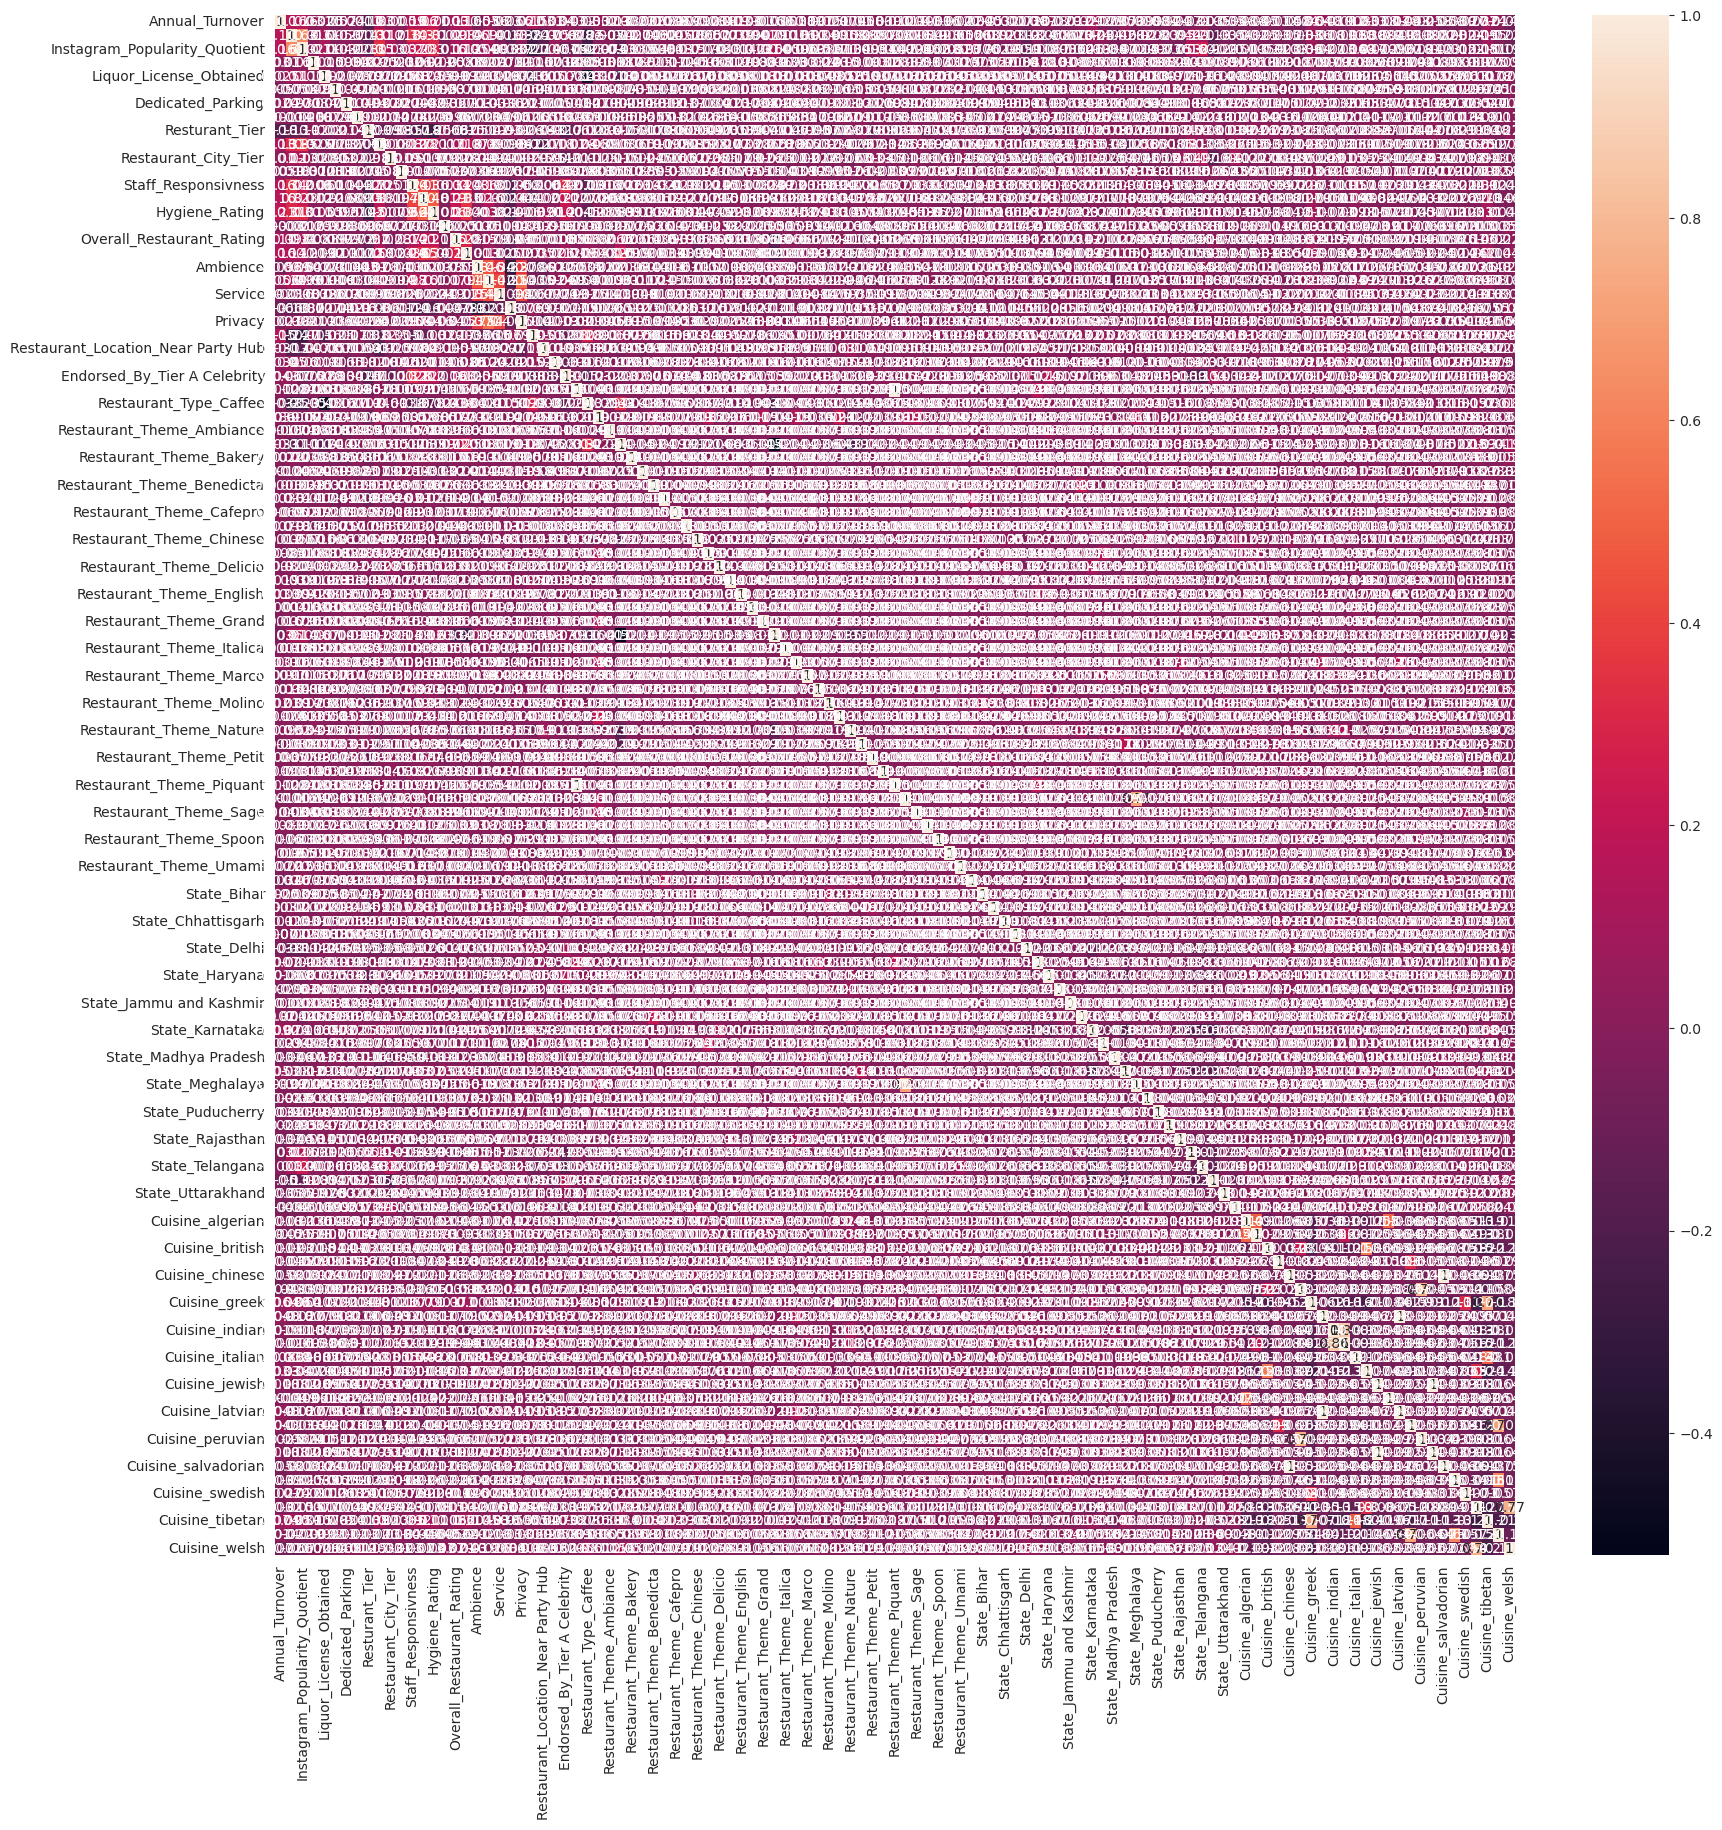

In [58]:
# plot heat map on the original df_train set
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [59]:
corr = df_train.corr()
corr_pos = corr[corr > 0.7]
corr_neg = corr[corr < -0.7]
print(corr_pos)
print(corr_neg)

                               Annual_Turnover  Facebook_Popularity_Quotient  \
Annual_Turnover                            1.0                           NaN   
Facebook_Popularity_Quotient               NaN                           1.0   
Instagram_Popularity_Quotient              NaN                           NaN   
Fire_Audit                                 NaN                           NaN   
Liquor_License_Obtained                    NaN                           NaN   
...                                        ...                           ...   
Cuisine_swedish                            NaN                           NaN   
Cuisine_thai                               NaN                           NaN   
Cuisine_tibetan                            NaN                           NaN   
Cuisine_turkish                            NaN                           NaN   
Cuisine_welsh                              NaN                           NaN   

                               Instagra

/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

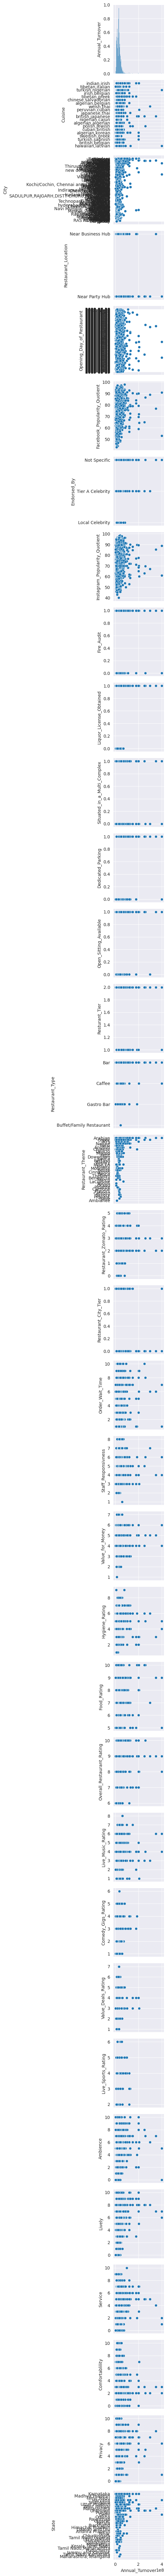

In [60]:
# go back to df, let's plot all variables against Annual_Turnover
sns.pairplot(data=df, y_vars=df.columns, x_vars=['Annual_Turnover'])
plt.show()


In [62]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)

1.0

In [64]:
dtr.score(x_test, y_test)

-0.46231454802227656

In [65]:
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



In [66]:
# Choose the type of classifier.
estimator = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 15),
    "min_samples_leaf": np.arange(1, 10),
    "max_leaf_nodes": np.arange(2, 10),
}

grid_obj = GridSearchCV(estimator, parameters, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(x_train, y_train) ## Complete the code to fit model on train data

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=5, min_samples_leaf=9,
                      random_state=1)

In [67]:
print("Train: ", estimator.score(x_train, y_train))
print("Test: ", estimator.score(x_test, y_test))

Train:  0.09863650665459289
Test:  0.019529171853009064


In [68]:
test_result_data = pd.read_csv('test_dataset_cleaned.csv', encoding='utf_16', index_col='Registration_Number')
test_result_data.head()

Cuisine       City Restaurant_Location  \
Registration_Number                                                    
20001                 tibetan,italian  Bangalore   Near Business Hub   
20002                 tibetan,italian  Hyderabad      Near Party Hub   
20003                algerian,belgian  Hyderabad      Near Party Hub   
20004                   tibetan,greek         -1      Near Party Hub   
20005                   cuban,british      Pune       Near Party Hub   

                    Opening_Day_of_Restaurant  Facebook_Popularity_Quotient  \
Registration_Number                                                           
20001                              2010-07-13                         78.00   
20002                              2011-09-05                         89.17   
20003                              2011-04-12                         84.00   
20004                              2005-01-16                         79.38   
20005                              2008-11-10                         84.67   

                         Endoresed_By  Instagram_Popularity_Quotient  \
Registration_Number                                                    
20001                Tier A Celebrity                          69.00   
20002                    Not Specific                          96.00   
20003                    Not Specific                          86.00   
20004                    Not Specific                          74.40   
20005                    Not Specific                          86.46   

                     Fire_Audit  Liquor_License_Obtained  \
Registration_Number                                        
20001                      True                     True   
20002                      True                     True   
20003                      True                     True   
20004                     False                     True   
20005                      True                     True   

                     Situated_in_a_Multi_Complex  ...  Live_Music_Rating  \
Registration_Number                               ...                      
20001                                       True  ...                NaN   
20002                                       True  ...                3.0   
20003                                       True  ...                3.0   
20004                                       True  ...                6.0   
20005                                       True  ...                NaN   

                     Comedy_Gigs_Rating  Value_Deals_Rating  \
Registration_Number                                           
20001                               2.0                 NaN   
20002                               NaN                 NaN   
20003                               NaN                 NaN   
20004                               NaN                 NaN   
20005                               NaN                 NaN   

                    Live_Sports_Rating Ambience  Lively  Service  \
Registration_Number                                                
20001                              NaN        5       2        2   
20002                              6.0        7       8        5   
20003                              NaN        9       7        5   
20004                              NaN        6       7        6   
20005                              NaN        4       4        7   

                     Comfortablility  Privacy        State  
Registration_Number                                         
20001                              6        0    Karnataka  
20002                              1        8    Telangana  
20003                              1        5    Telangana  
20004                              4        7      Unknown  
20005                              7        3  Maharashtra  

[5 rows x 33 columns]

In [69]:
missing_cols = test_result_data.columns[test_result_data.isnull().any()]
missing_cols.to_numpy()

array(['Overall_Restaurant_Rating', 'Live_Music_Rating',
       'Comedy_Gigs_Rating', 'Value_Deals_Rating', 'Live_Sports_Rating'],
      dtype=object)

In [70]:
test_result_data.drop(columns=['Comedy_Gigs_Rating', 'Value_Deals_Rating', 'Live_Sports_Rating'], inplace=True)

In [72]:
test_result_data.Overall_Restaurant_Rating.fillna(test_result_data.Overall_Restaurant_Rating.median(), inplace=True)

In [73]:
test_result_data.Live_Music_Rating.fillna(test_result_data.Live_Music_Rating.median(), inplace=True)

In [ ]:
test_result_data['Days_Opened'] = (pd.to_datetime('2017-01-01') - pd.to_datetime(test_result_data.Opening_Day_of_Restaurant)).dt.days
# get dummies for restaurant location
test_result_data = pd.get_dummies(test_result_data, columns=['Restaurant_Location'], dtype=int, drop_first=True)


In [76]:
test_result_data.rename(columns={'Endoresed_By': 'Endorsed_By'}, inplace=True)

In [77]:
# dummies for Endorsed_By
test_result_data = pd.get_dummies(test_result_data, columns=['Endorsed_By'], dtype=int)
test_result_data.drop(columns=['Endorsed_By_Not Specific'], inplace=True)
test_result_data = pd.get_dummies(test_result_data, columns=['Restaurant_Type'], dtype=int, drop_first=True)
test_result_data = pd.get_dummies(test_result_data, columns=['Restaurant_Theme'], dtype=int, drop_first=True)

test_state_dummies = test_result_data['State'].str.get_dummies(sep=',')
# append the columns from test_state_dummies to test_result_data by index (Registration_Number). Appended column name should have the prefix "State_"
test_result_data = test_result_data.join(test_state_dummies.add_prefix('State_'))

test_result_data.drop(columns=['State_Unknown'], inplace=True)
test_cuisine_dummies = test_result_data['Cuisine'].str.get_dummies(sep=',')
test_result_data = test_result_data.join(test_cuisine_dummies.add_prefix('Cuisine_'))


test_result_data.drop(columns=['Cuisine', 'City', 'Opening_Day_of_Restaurant', 'State'], inplace=True)

test_result_data.head()

Facebook_Popularity_Quotient  \
Registration_Number                                 
20001                                       78.00   
20002                                       89.17   
20003                                       84.00   
20004                                       79.38   
20005                                       84.67   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
20001                                        69.00        True   
20002                                        96.00        True   
20003                                        86.00        True   
20004                                        74.40       False   
20005                                        86.46        True   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
20001                                   True                         True   
20002                                   True                         True   
20003                                   True                         True   
20004                                   True                         True   
20005                                   True                         True   

                     Dedicated_Parking  Open_Sitting_Available  \
Registration_Number                                              
20001                             True                   False   
20002                             True                    True   
20003                            False                    True   
20004                             True                    True   
20005                            False                   False   

                     Resturant_Tier  Restaurant_Zomato_Rating  \
Registration_Number                                             
20001                             2                         3   
20002                             2                         4   
20003                             2                         2   
20004                             2                         3   
20005                             1                         4   

                     Restaurant_City_Tier  ...  Cuisine_nigerian  \
Registration_Number                        ...                     
20001                               False  ...                 0   
20002                               False  ...                 0   
20003                               False  ...                 0   
20004                               False  ...                 0   
20005                                True  ...                 0   

                     Cuisine_peruvian  Cuisine_polish  Cuisine_salvadorian  \
Registration_Number                                                          
20001                               0               0                    0   
20002                               0               0                    0   
20003                               0               0                    0   
20004                               0               0                    0   
20005                               0               0                    0   

                     Cuisine_sapnish  Cuisine_swedish  Cuisine_thai  \
Registration_Number                                                   
20001                              0                0             0   
20002                              0                0             0   
20003                              0                0             0   
20004                              0                0             0   
20005                              0                0             0   

                     Cuisine_tibetan  Cuisine_turkish  Cuisine_welsh  
Registration_Number                                                   
20001                              1                0          

In [78]:
# in a loop, convert all bool columns to int64
for col in test_result_data.columns:
    if test_result_data[col].dtype == 'bool':
        test_result_data[col] = test_result_data[col].astype('int64')
        
test_result_data.head()

Facebook_Popularity_Quotient  \
Registration_Number                                 
20001                                       78.00   
20002                                       89.17   
20003                                       84.00   
20004                                       79.38   
20005                                       84.67   

                     Instagram_Popularity_Quotient  Fire_Audit  \
Registration_Number                                              
20001                                        69.00           1   
20002                                        96.00           1   
20003                                        86.00           1   
20004                                        74.40           0   
20005                                        86.46           1   

                     Liquor_License_Obtained  Situated_in_a_Multi_Complex  \
Registration_Number                                                         
20001                                      1                            1   
20002                                      1                            1   
20003                                      1                            1   
20004                                      1                            1   
20005                                      1                            1   

                     Dedicated_Parking  Open_Sitting_Available  \
Registration_Number                                              
20001                                1                       0   
20002                                1                       1   
20003                                0                       1   
20004                                1                       1   
20005                                0                       0   

                     Resturant_Tier  Restaurant_Zomato_Rating  \
Registration_Number                                             
20001                             2                         3   
20002                             2                         4   
20003                             2                         2   
20004                             2                         3   
20005                             1                         4   

                     Restaurant_City_Tier  ...  Cuisine_nigerian  \
Registration_Number                        ...                     
20001                                   0  ...                 0   
20002                                   0  ...                 0   
20003                                   0  ...                 0   
20004                                   0  ...                 0   
20005                                   1  ...                 0   

                     Cuisine_peruvian  Cuisine_polish  Cuisine_salvadorian  \
Registration_Number                                                          
20001                               0               0                    0   
20002                               0               0                    0   
20003                               0               0                    0   
20004                               0               0                    0   
20005                               0               0                    0   

                     Cuisine_sapnish  Cuisine_swedish  Cuisine_thai  \
Registration_Number                                                   
20001                              0                0             0   
20002                              0                0             0   
20003                              0                0             0   
20004                              0                0             0   
20005                              0                0             0   

                     Cuisine_tibetan  Cuisine_turkish  Cuisine_welsh  
Registration_Number                                                   
20001                              1                0          

In [79]:
prediction = regression_model.predict(test_result_data)
prediction

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- State_Assam
Feature names seen at fit time, yet now missing:
- Restaurant_Theme_Bakery
- Restaurant_Theme_Bettaso
- Restaurant_Theme_Cafepro
- Restaurant_Theme_Cinnamon
- Restaurant_Theme_Downtown
- ...


In [88]:
x_train_2 = x_train.copy()
# drop all columns with name started with 'Restaurant_Theme'
for col in x_train_2.columns:
    if col.startswith('Restaurant_Theme'):
        x_train_2.drop(col, axis=1, inplace=True)
x_test2 = x_test.copy()
for col in x_test2.columns:
    if col.startswith('Restaurant_Theme'):
        x_test2.drop(col, axis=1, inplace=True)


In [94]:
x_train_2.drop(['State_Daman and Diu', 'State_Himachal Pradesh', 'State_Jammu and Kashmir', 'State_Meghalaya'], axis=1, inplace=True)
x_test2.drop(['State_Daman and Diu', 'State_Himachal Pradesh', 'State_Jammu and Kashmir', 'State_Meghalaya'], axis=1, inplace=True)

In [95]:
regression_model_2 = LinearRegression()
regression_model_2.fit(x_train_2, y_train)
print("Train score:", regression_model_2.score(x_train_2, y_train))

Train score: 0.19250323498322808


/home/tinlong/anaconda3/envs/dataspell/lib/python3.11/site-packages/daal4py/sklearn/utils/validation.py:239: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  not array.dtypes.apply(is_sparse).any():


In [96]:
regression_model_2.score(x_test2, y_test)


0.10971292536557964

In [97]:
test_result_data_exec = test_result_data.copy()
test_result_data_exec.drop(['State_Assam'], inplace=True, axis=1)
for col in test_result_data_exec.columns:
    if col.startswith('Restaurant_Theme'):
        test_result_data_exec.drop(col, axis=1, inplace=True)


In [98]:
prediction_2 = regression_model_2.predict(test_result_data_exec)

In [99]:
prediction_2

array([29153189.25868501, 33505418.23168886, 25955065.12912341,
       44297303.70576191, 47197476.32331291, 37822059.6497757 ,
       26203305.04315474, 40462591.46584915, 25050033.9803098 ,
       26207668.16782594, 22959882.16834939, 31918885.69906899,
       28304265.4388327 , 24295128.58546359, 16778416.58823003,
       35657796.02273002, 39164814.13302328, 13529334.13392571,
       37593282.45935889, 30691635.8312257 , 18139713.78141871,
       35801211.5263738 , 27876201.34140741, 20640584.22972028,
       36545228.01468992, 24066276.09825598, 37956589.04445376,
       32462373.85348916, 34826684.77443786, 23370535.23180303,
       42292203.41920444, 37331155.25671628, 27167528.50801336,
       34836565.46539398, 26652090.16566049, 26829850.98586239,
       38831640.80682546, 34302354.21197008, 18438887.66097056,
       28771603.84875778, 25558016.55662059, 30937470.91218763,
       28016956.62713769, 25085186.57089308, 36680727.60930207,
       18851277.77288122, 25936277.82990

In [100]:
regression_model_2.score(test_result_data_exec, prediction_2)

1.0

In [103]:
result_df = test_result_data_exec.copy()
result_df.reset_index(level=0, inplace=True)
result_df.head()

Registration_Number  Facebook_Popularity_Quotient  \
0                20001                         78.00   
1                20002                         89.17   
2                20003                         84.00   
3                20004                         79.38   
4                20005                         84.67   

   Instagram_Popularity_Quotient  Fire_Audit  Liquor_License_Obtained  \
0                          69.00           1                        1   
1                          96.00           1                        1   
2                          86.00           1                        1   
3                          74.40           0                        1   
4                          86.46           1                        1   

   Situated_in_a_Multi_Complex  Dedicated_Parking  Open_Sitting_Available  \
0                            1                  1                       0   
1                            1                  1                       1   
2                            1                  0                       1   
3                            1                  1                       1   
4                            1                  0                       0   

   Resturant_Tier  Restaurant_Zomato_Rating  ...  Cuisine_nigerian  \
0               2                         3  ...                 0   
1               2                         4  ...                 0   
2               2                         2  ...                 0   
3               2                         3  ...                 0   
4               1                         4  ...                 0   

   Cuisine_peruvian  Cuisine_polish  Cuisine_salvadorian  Cuisine_sapnish  \
0                 0               0                    0                0   
1                 0               0                    0                0   
2                 0               0                    0                0   
3                 0               0                    0                0   
4                 0               0                    0                0   

   Cuisine_swedish  Cuisine_thai  Cuisine_tibetan  Cuisine_turkish  \
0                0             0                1                0   
1                0             0                1                0   
2                0             0                0                0   
3                0             0                1                0   
4                0             0                0                0   

   Cuisine_welsh  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 76 columns]

In [104]:
result = pd.DataFrame({'Registration_Number': result_df['Registration_Number'], 'Annual_Turnover': prediction_2})
result.to_csv('result.csv', index=False)